<a href="https://colab.research.google.com/github/feriapriliano00/datamining/blob/main/Klasifikasi_Data_dengan_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("Data_Set.csv")
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [3]:
print(x)

[[   19 11000]
 [   18 21000]
 [   20 40000]
 [   20 20000]
 [   22 22000]
 [   24 45000]
 [   27 50000]
 [   25 48000]
 [   21 34000]
 [   29 70000]
 [   17 65000]
 [   30 43000]
 [   31 47000]
 [   33 12000]
 [   35 17000]]


In [4]:
print(y)

[0 1 1 0 0 1 0 1 0 0 0 1 0 0 0]


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [6]:
print(x_train)

[[   35 17000]
 [   22 22000]
 [   20 40000]
 [   33 12000]
 [   17 65000]
 [   25 48000]
 [   30 43000]
 [   20 20000]
 [   19 11000]
 [   24 45000]
 [   31 47000]]


In [7]:
print(x_test)

[[   18 21000]
 [   27 50000]
 [   21 34000]
 [   29 70000]]


In [8]:
print(y_train)

[0 0 1 0 0 1 1 0 0 1 0]


In [9]:
print(y_test)

[1 0 0 0]


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
print(x_train)

[[ 1.67513985 -0.97470126]
 [-0.52252069 -0.68175826]
 [-0.86062231  0.37283655]
 [ 1.33703823 -1.26764427]
 [-1.36777474  1.83755156]
 [-0.01536826  0.84154535]
 [ 0.8298858   0.54860235]
 [-0.86062231 -0.79893546]
 [-1.02967312 -1.32623287]
 [-0.18441907  0.66577955]
 [ 0.99893661  0.78295675]]


In [12]:
print(x_test)

[[-1.19872393 -0.74034686]
 [ 0.32273337  0.95872255]
 [-0.6915715   0.02130495]
 [ 0.66083499  2.13049457]]


In [13]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [14]:
y_pred = classifier.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2 1]
 [1 0]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


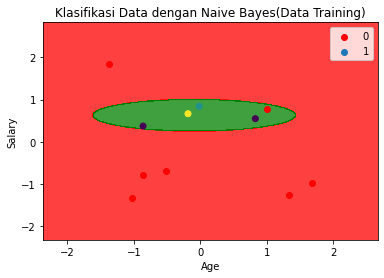

In [16]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes(Data Training)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()